In [149]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
%matplotlib notebook
import random as rn

In [294]:
df = pd.read_csv(r'D:\ML Course\Rare_Anomaly_Detection.csv',header=0,index_col=1)

In [295]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head(5)

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,class
timestamp,,,,,,,,,,,,,,,,,,,,,
4/1/2018 0:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,1
4/1/2018 0:01,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,1
4/1/2018 0:02,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,1
4/1/2018 0:03,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,1
4/1/2018 0:04,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,1


In [297]:
df.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,class
count,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000,220320.000000
mean,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,...,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667,1.131386
std,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,...,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607,0.495587
min,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,...,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779,0.000000
25%,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,...,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800,1.000000
50%,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,...,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000,1.000000
75%,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,15.118630,...,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,219.907400,216.724500,1.000000
max,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,25.000000,...,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000,3.000000


In [298]:
# Converting class 3 to 0 to consider as anamoly 
df.rename(columns={'class': 'label'}, inplace=True)
df["label"].replace({3: 0}, inplace=True)
df.label.unique()

array([1, 0], dtype=int64)

In [222]:
# check availability of the data
(df.isnull().sum()/len(df))*100

sensor_00     4.633261
sensor_01     0.167484
sensor_02     0.008624
sensor_03     0.008624
sensor_04     0.008624
sensor_05     0.008624
sensor_06     2.177741
sensor_07     2.474129
sensor_08     2.317992
sensor_09     2.085603
sensor_10     0.008624
sensor_11     0.008624
sensor_12     0.008624
sensor_13     0.008624
sensor_14     0.009532
sensor_16     0.014070
sensor_17     0.020879
sensor_18     0.020879
sensor_19     0.007262
sensor_20     0.007262
sensor_21     0.007262
sensor_22     0.018609
sensor_23     0.007262
sensor_24     0.007262
sensor_25     0.016340
sensor_26     0.009078
sensor_27     0.007262
sensor_28     0.007262
sensor_29     0.032680
sensor_30     0.118464
sensor_31     0.007262
sensor_32     0.030864
sensor_33     0.007262
sensor_34     0.007262
sensor_35     0.007262
sensor_36     0.007262
sensor_37     0.007262
sensor_38     0.012255
sensor_39     0.012255
sensor_40     0.012255
sensor_41     0.012255
sensor_42     0.012255
sensor_43     0.012255
sensor_44  

In [299]:
# check for Duplicacy timestamp row
df[df.index.duplicated()]

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,label
timestamp,,,,,,,,,,,,,,,,,,,,,


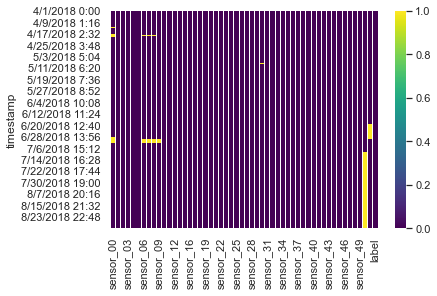

In [300]:
%matplotlib inline 
sns.heatmap(df.isnull(), cmap='viridis')

In [301]:
# One trivial value is observed in the data set i.e. 1000, removing the trivial value
# Dropping sensor_50 column from the analysis as the data availability is low
df.drop(['sensor_50'],axis=1,inplace=True)
df = df[df != 1000]
df.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,label
count,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,...,220293.000000,220293.000000,220291.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,201874.000000,220320.000000
mean,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,...,35.453455,43.879591,42.648185,43.094984,48.018585,44.340903,150.889044,57.119968,190.602364,0.934259
std,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,...,10.259521,11.044404,11.211255,12.837520,15.641284,10.442437,82.244957,19.143598,48.992933,0.247829
min,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.777779,0.000000
25%,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,178.530100,1.000000
50%,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,197.048600,1.000000
75%,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,15.118630,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,215.567100,1.000000
max,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,25.000000,...,374.218800,408.593700,361.689800,320.312500,370.370400,303.530100,561.632000,464.409700,466.145800,1.000000


In [302]:
# Impute / Replace Missing Values with Median -  As we can see their are missing values in the few columns
# and also a large difference is also observed between max and average value..the data set is skewed so
# missing values are filled with median values
df = df.fillna(df.median())

In [303]:
anamoly_class = df[df.label == 0]
normal_class = df[df.label == 1]
RANDOM_SEED = 42
# undersample normal data
normal_class_undersample = normal_class.sample(int(len(anamoly_class) * 5),random_state=RANDOM_SEED)
# concatenate with anamoly class into a single dataframe
visualisation_initial = pd.concat([anamoly_class, normal_class_undersample])
column_names = list(visualisation_initial.drop('label', axis=1).columns)
# isolate features from labels 
features, labels = visualisation_initial.drop('label', axis=1).values, \
                   visualisation_initial.label.values


In [304]:
normal_class.shape

(205836, 51)

<IPython.core.display.Javascript object>


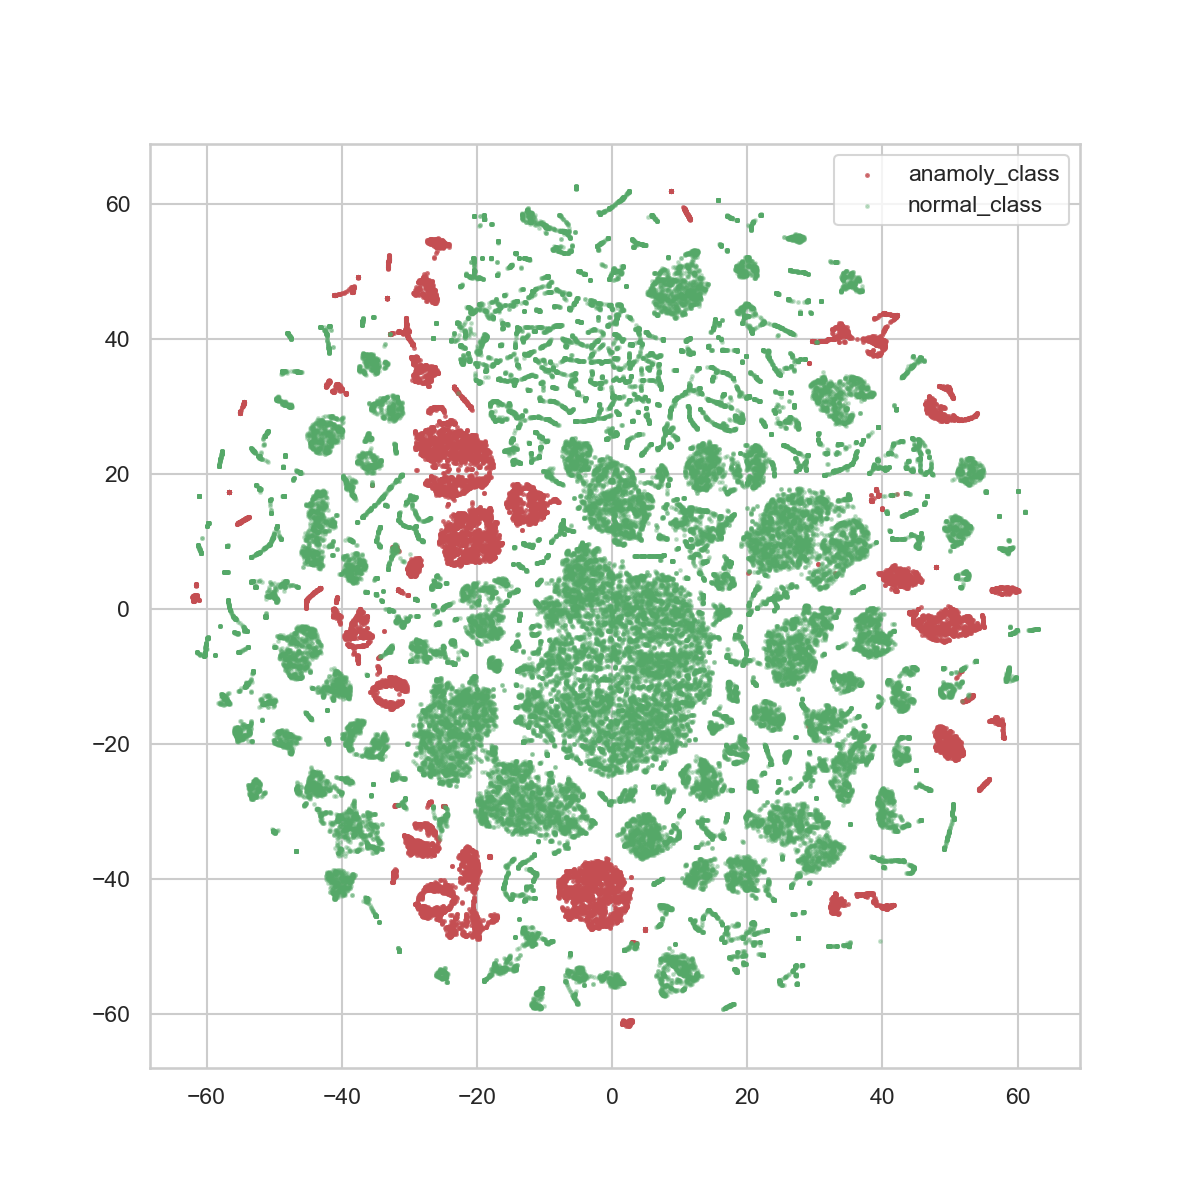

In [260]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
def tsne_scatter(features, labels, dimensions=2, save_as='graph.png'):
    if dimensions not in (2, 3):
        raise ValueError('tsne_scatter can only plot in 2d or 3d')
    # t-SNE dimensionality reduction
    features_embedded = TSNE(n_components=dimensions, random_state=RANDOM_SEED).fit_transform(features)
    
    # initialising the plot
    fig, ax = plt.subplots(figsize=(8,8))
    
    # counting dimensions
    if dimensions == 3: ax = fig.add_subplot(111, projection='3d')

    # plotting data
    ax.scatter(
        *zip(*features_embedded[np.where(labels==0)]),
        marker='o',
        color='r',
        s=2,
        alpha=0.7,
        label='anamoly_class'
    )
    ax.scatter(
        *zip(*features_embedded[np.where(labels==1)]),
        marker='o',
        color='g',
        s=2,
        alpha=0.3,
        label='normal_class'
    )

    # storing it to be displayed later
    plt.legend(loc='best')
    plt.savefig(save_as);
    plt.show;
tsne_scatter(features, labels, dimensions=2)

In [305]:
print(f"""Shape of the datasets:
    anamoly_class (rows, cols) = {anamoly_class.shape}
    normal_class (rows, cols) = {normal_class.shape}""")

Shape of the datasets:
    anamoly_class (rows, cols) = (14484, 51)
    normal_class (rows, cols) = (205836, 51)


In [306]:
TRAINING_SAMPLE = int(len(normal_class)*0.8)
# shuffle the training set
normal_class = normal_class.sample(frac=1).reset_index(drop=True)

# training set: exlusively non-fraud transactions
X_train = normal_class.iloc[:TRAINING_SAMPLE].drop('label', axis=1)

# testing  set: the remaining non-fraud + all the fraud 
X_test = normal_class.iloc[TRAINING_SAMPLE:].append(anamoly_class).sample(frac=1)

In [307]:
print(f"""Our testing set is composed as follows:

{X_test.label.value_counts()}""")

Our testing set is composed as follows:

1    41168
0    14484
Name: label, dtype: int64


In [308]:
from sklearn.model_selection import train_test_split
VALIDATE_SIZE = 0.2
# train // validate - no labels since they're all clean anyway
X_train, X_validate = train_test_split(X_train, test_size=VALIDATE_SIZE, random_state=RANDOM_SEED)

# manually splitting the labels from the test df
X_test, y_test = X_test.drop('label', axis=1).values, X_test.label.values

print(f"""Shape of the datasets:
    training (rows, cols) = {X_train.shape}
    validate (rows, cols) = {X_validate.shape}
    holdout  (rows, cols) = {X_test.shape}""")

Shape of the datasets:
    training (rows, cols) = (131734, 50)
    validate (rows, cols) = (32934, 50)
    holdout  (rows, cols) = (55652, 50)


In [309]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline

# configure our pipeline
pipeline = Pipeline([('normalizer', Normalizer()),('scaler', MinMaxScaler())])
# get normalization parameters by fitting to the training data
pipeline.fit(X_train)
# transform the training and validation data with these parameters
X_train_transformed = pipeline.transform(X_train)
X_validate_transformed = pipeline.transform(X_validate)

<IPython.core.display.Javascript object>


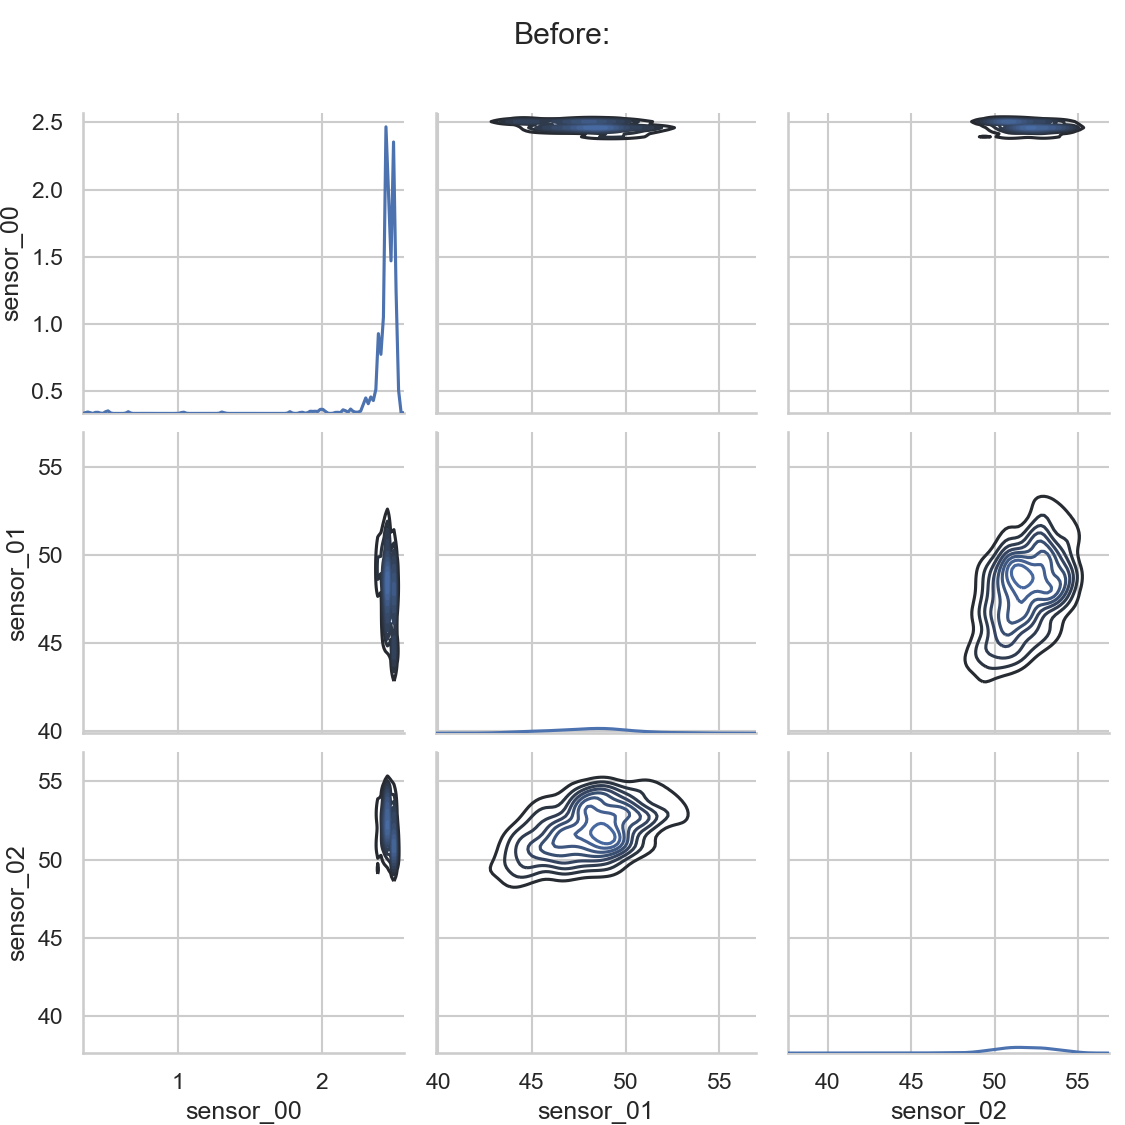

In [164]:
g = sns.PairGrid(X_train.iloc[:,:3].sample(600, random_state=RANDOM_SEED))
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Before:')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot)

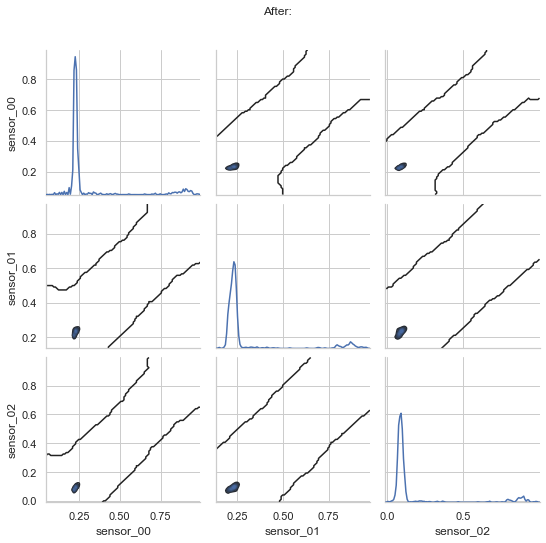

In [310]:
g = sns.PairGrid(pd.DataFrame(X_train_transformed, columns=column_names).iloc[:,:3].sample(600, random_state=RANDOM_SEED))
plt.subplots_adjust(top=0.9)
g.fig.suptitle('After:')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot)

In [424]:
# data dimensions // hyperparameters 
input_dim = X_train_transformed.shape[1]
BATCH_SIZE = 256
EPOCHS = 100

# https://keras.io/layers/core/
autoencoder = tf.keras.models.Sequential([
    
    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='relu', input_shape=(input_dim, ), use_bias = True), 
    tf.keras.layers.Dense(16, activation='relu',use_bias = True),
    tf.keras.layers.Dense(8, activation='relu', use_bias = True),
    tf.keras.layers.Dense(4, activation='relu', use_bias = True),
    tf.keras.layers.Dense(2, activation='relu', use_bias = True),
    # reconstruction / decode
    tf.keras.layers.Dense(4, activation='relu', use_bias = True),
    tf.keras.layers.Dense(8, activation='relu', use_bias = True),
    tf.keras.layers.Dense(16, activation='relu', use_bias = True),
    tf.keras.layers.Dense(input_dim, activation='relu', use_bias = True)
    
])

autoencoder.compile(optimizer="adam", 
                    loss="mse",
                    metrics=["acc"])

# print an overview of our model
autoencoder.summary()


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_145 (Dense)            (None, 16)                816       
_________________________________________________________________
dense_146 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_147 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_148 (Dense)            (None, 2)                 10        
_________________________________________________________________
dense_149 (Dense)            (None, 4)                 12        
_________________________________________________________________
dense_150 (Dense)            (None, 8)               

In [425]:
from datetime import datetime

# current date and time
yyyymmddHHMM = datetime.now().strftime('%Y%m%d%H%M')

# new folder for a new run
log_subdir = f'{yyyymmddHHMM}_batch{BATCH_SIZE}_layers{len(autoencoder.layers)}'

# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

save_model = tf.keras.callbacks.ModelCheckpoint(
    filepath='autoencoder_best_weights.hdf5',
    save_best_only=True,
        monitor='val_loss',
    verbose=0,
    mode='min'
)

cb = [early_stop, save_model]

In [426]:
history = autoencoder.fit(
    X_train_transformed, X_train_transformed,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=cb,
    validation_data=(X_validate_transformed, X_validate_transformed)
);


Train on 131734 samples, validate on 32934 samples
Epoch 1/100
131734/131734 [==============================] - 4s 33us/sample - loss: 0.0367 - acc: 0.6907 - val_loss: 0.0302 - val_acc: 0.8737
Epoch 2/100
131734/131734 [==============================] - 2s 17us/sample - loss: 0.0261 - acc: 0.8722 - val_loss: 0.0258 - val_acc: 0.8731
Epoch 3/100
131734/131734 [==============================] - 2s 17us/sample - loss: 0.0258 - acc: 0.8733 - val_loss: 0.0257 - val_acc: 0.8782
Epoch 4/100
131734/131734 [==============================] - 2s 16us/sample - loss: 0.0256 - acc: 0.8754 - val_loss: 0.0254 - val_acc: 0.8761
Epoch 5/100
131734/131734 [==============================] - 2s 17us/sample - loss: 0.0254 - acc: 0.8757 - val_loss: 0.0253 - val_acc: 0.8747
Epoch 6/100
131734/131734 [==============================] - 2s 17us/sample - loss: 0.0254 - acc: 0.8755 - val_loss: 0.0253 - val_acc: 0.8794
Epoch 7/100
131734/131734 [==============================] - 2s 17us/sample - loss: 0.0253 - acc:

In [427]:
# transform the test set with the pipeline fitted to the training set
X_test_transformed = pipeline.transform(X_test)

# pass the transformed test set through the autoencoder to get the reconstructed result
reconstructions = autoencoder.predict(X_test_transformed)

In [429]:
# calculating the mean squared error reconstruction loss per row in the numpy array
mse = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)

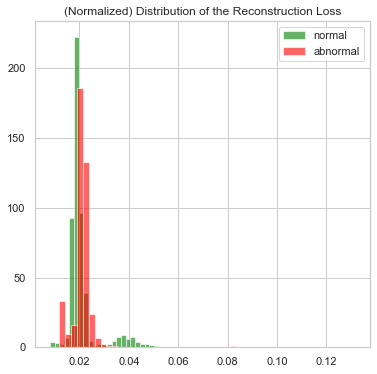

In [430]:
normal = mse[y_test==1]
abnormal = mse[y_test==0]

fig, ax = plt.subplots(figsize=(6,6))

ax.hist(normal, bins=50, density=True, label="normal", alpha=.6, color="green")
ax.hist(abnormal, bins=50, density=True, label="abnormal", alpha=.6, color="red")

plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.legend()
plt.show()

In [431]:
THRESHOLD = 3

def mad_score(points):
    m = np.median(points)
    ad = np.abs(points - m)
    mad = np.median(ad)
    
    return 0.6745 * ad / mad

z_scores = mad_score(mse)
outliers = z_scores > THRESHOLD

In [432]:
print(f"Detected {np.sum(outliers):,} outliers in a total of {np.size(z_scores):,} transactions [{np.sum(outliers)/np.size(z_scores):.2%}].")

Detected 5,444 outliers in a total of 55,652 transactions [9.78%].


In [433]:
from sklearn.metrics import (confusion_matrix, 
                             precision_recall_curve)

# get (mis)classification
cm = confusion_matrix(y_test, outliers)

# true/false positives/negatives
(tn, fp,  fn, tp) = cm.flatten()

In [434]:
print(f"""The classifications using the MAD method with threshold={THRESHOLD} are as follows:
{cm}

% of transactions labeled as fraud that were correct (precision): {tp}/({fp}+{tp}) = {tp/(fp+tp):.2%}
% of fraudulent transactions were caught succesfully (recall):    {tp}/({fn}+{tp}) = {tp/(fn+tp):.2%}""")

The classifications using the MAD method with threshold=3 are as follows:
[[13866   618]
 [36342  4826]]

% of transactions labeled as fraud that were correct (precision): 4826/(618+4826) = 88.65%
% of fraudulent transactions were caught succesfully (recall):    4826/(36342+4826) = 11.72%


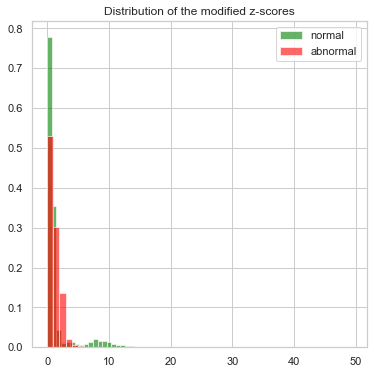

In [435]:
normal = z_scores[y_test==1]
abnormal = z_scores[y_test==0]

fig, ax = plt.subplots(figsize=(6,6))

ax.hist(normal, bins=50, density=True, label="normal", alpha=.6, color="green")
ax.hist(abnormal, bins=50, density=True, label="abnormal", alpha=.6, color="red")

plt.title("Distribution of the modified z-scores")
plt.legend()
plt.show()

In [436]:
encoder = tf.keras.models.Sequential(autoencoder.layers[:5])
encoder.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_145 (Dense)            (None, 16)                816       
_________________________________________________________________
dense_146 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_147 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_148 (Dense)            (None, 2)                 10        
Total params: 3,548
Trainable params: 3,548
Non-trainable params: 0
_________________________________________________________________


In [437]:
# taking all the fraud, undersampling clean
abnormal = X_test_transformed[y_test==0]
normal = X_test_transformed[y_test==1][:len(abnormal) * 5, ]

# combining arrays & building labels
features = np.append(abnormal, normal, axis=0)
labels = np.append(np.ones(len(abnormal)),
                   np.zeros(len(normal)))

# getting latent space representation
latent_representation = encoder.predict(features)

print(f'Clean transactions downsampled from {len(X_test_transformed[y_test==1]):,} to {len(normal):,}.')
print('Shape of latent representation:', latent_representation.shape)

Clean transactions downsampled from 41,168 to 41,168.
Shape of latent representation: (55652, 2)


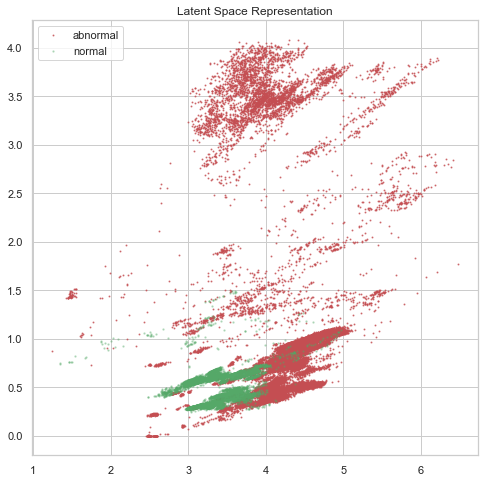

In [438]:
X = latent_representation[:,0]
y = latent_representation[:,1]

# plotting
plt.subplots(figsize=(8, 8))
plt.scatter(X[labels==0], y[labels==0], s=1, c='r', alpha=0.7, label='abnormal')
plt.scatter(X[labels==1], y[labels==1], s=2, c='g', alpha=0.3, label='normal')

# labeling
plt.legend(loc='best')
plt.title('Latent Space Representation')

# saving & displaying
plt.savefig('latent_representation_2d');
plt.show()